In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.family'] = 'DejaVu Sans'
#plt.rcParams['font.family'] = 'Arial'
plt.rcParams['lines.linewidth'] = 1

In [3]:
aperture4 = 'golay6+1'
name_golay = 'Golay$_{\mathdefault{6+1}}$'
name_center = 'Center Aperture'

grid = 5.600
psf_size = 200
middle_row_index = 100
psf_x = torch.linspace(-psf_size * grid/2, psf_size * grid/2, psf_size)

psf_golay = np.load(f"grid5.6/psf_golay/hyperboloid/hyperboloid_golay_psf_4.500_2d.npy")
psf_center = np.load(f"grid5.6/psf_center/hyperboloid/hyperboloid_center_r8_psf_4.500_2d.npy")

Plot and show the PSFs

In [4]:
## Function to plot and show the three-dimentional point spread function
def plot_3d_psf(psf, ap_name):
    
    x = np.linspace(-psf_size * grid / 2, psf_size * grid / 2, psf.shape[0])
    y = np.linspace(-psf_size * grid / 2, psf_size * grid / 2, psf.shape[1])
    x, y = np.meshgrid(x, y)
    z = psf  

    fig = plt.figure(figsize=(3, 3))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, z, cmap='rainbow')
    ax.set_xlabel('x (μm)', fontsize=8, labelpad=-10)
    ax.set_ylabel('y (μm)', fontsize=8, labelpad=-10)
    ax.grid(False)
    ax.tick_params(axis='both', which='major', labelsize=7)
    ax.set_zticks([])  
    ax.tick_params(axis='x', width=0.5, pad=-5)  
    ax.tick_params(axis='y', width=0.5, pad=-5)  
    ax.grid(False)
    ax.set(facecolor='none')  
    ax.xaxis.line.set_lw(0.0)
    ax.yaxis.line.set_lw(0.0)
    ax.zaxis.line.set_lw(0.0)


    ax.set_title(f"{ap_name}'s PSF", fontsize=10)
    plt.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)
    
    plt.tight_layout()
    
    plt.show()


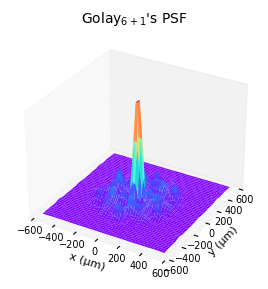

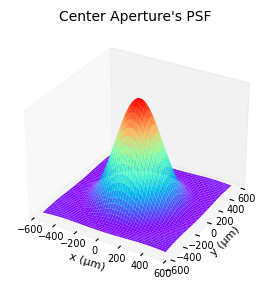

In [5]:
## Plot and show the golay aperture' PSF
plot_3d_psf(psf_golay[75:125, 75:125], name_golay)

## Plot and show the center aperture' PSF
plot_3d_psf(psf_center[75:125, 75:125], name_center)

Plot and show the MTFs

In [6]:
## Function to get the full magnitude spectrum and its horizontal and vertical profiles, together with the corresponding spatial frequencies
def get_mtf(psf_2d, du):

    ft_psf = np.fft.fft2(psf_2d)
    ft_psf_shifted = np.fft.fftshift(ft_psf)
    magnitude_spectrum = np.abs(ft_psf_shifted)
    magnitude_spectrum = magnitude_spectrum / np.max(magnitude_spectrum)
    log_magnitude_spectrum = np.log(magnitude_spectrum)

    L = psf_2d.shape[1]*du 
    fu = np.arange(-1/(2*du), 1/(2*du), 1/L)
    half_length = len(fu) // 2

    cropped_log_magnitude_spectrum = log_magnitude_spectrum
    
    middle_row_index = magnitude_spectrum.shape[0] // 2
    middle_row = magnitude_spectrum[middle_row_index, :]
    middle_col = magnitude_spectrum[:, middle_row_index]

    mtf_x_length = half_length
    mtf_1d_x = fu[half_length:half_length+mtf_x_length]
    mtf_horizontal = middle_row[half_length:half_length+mtf_x_length]
    mtf_vertical = middle_col[half_length:half_length+mtf_x_length]
    
    return cropped_log_magnitude_spectrum, fu, mtf_1d_x, mtf_horizontal, mtf_vertical

In [7]:
cropped_log_magnitude_spectrum_golay, fu_golay, mtf_1d_x_golay, mtf_horizontal_golay, mtf_vertical_golay = get_mtf(psf_2d=psf_golay, du=5.6e-3)
cropped_log_magnitude_spectrum_center, fu_center, mtf_1d_x_center, mtf_horizontal_center, mtf_vertical_center = get_mtf(psf_2d=psf_center, du=5.6e-3)

In [8]:
def plot_2d_mtf(cropped_log_magnitude_spectrum, name, fu):

    plt.figure(figsize=(2, 2))
    plt.imshow(cropped_log_magnitude_spectrum, cmap='ocean', extent=[fu[0], fu[-1], fu[0], fu[-1]], vmax=0, vmin=-18)

    plt.tick_params(axis='both', which='major', labelsize=7) 

    cbar = plt.colorbar(shrink=0.8)
    cbar.ax.tick_params(labelsize=7)

    plt.title(f"{name}'s MTF", fontsize=10)
    plt.xlabel('Spatial Frequency (lp/mm)', fontsize=8)
    plt.ylabel('Spatial Frequency (lp/mm)', fontsize=8)
    plt.show()

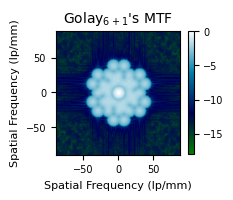

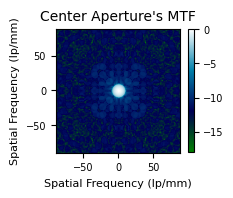

In [9]:
## Plot and show the golay aperture's MTF
plot_2d_mtf(cropped_log_magnitude_spectrum_golay, name_golay, fu_golay)

## Plot and show the center aperture's MTF
plot_2d_mtf(cropped_log_magnitude_spectrum_center, name_center, fu_center)

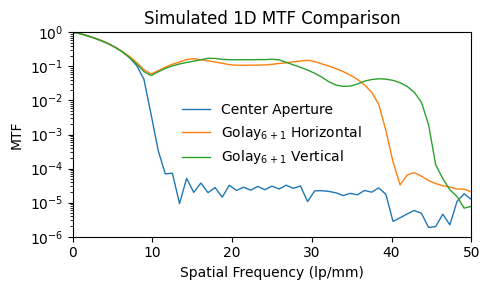

In [10]:
## MTF horizontal and vertical profile comparision

plt.figure(figsize=(5, 3))

plt.semilogy(mtf_1d_x_center, mtf_horizontal_center, label='Center Aperture') # For center aperture, the horizontal and vertical MTFs are the same
plt.semilogy(mtf_1d_x_golay, mtf_horizontal_golay, label="Golay$_{\mathdefault{6+1}}$ Horizontal")
plt.semilogy(mtf_1d_x_golay, mtf_vertical_golay, label="Golay$_{\mathdefault{6+1}}$ Vertical")

plt.ylim(1e-6, 1)
plt.tick_params(axis='both')

plt.title('Simulated 1D MTF Comparison')
plt.xlabel('Spatial Frequency (lp/mm)')
plt.ylabel('MTF')
plt.xticks()
plt.yticks()
plt.xlim(left=0, right=50)
plt.legend(frameon=False)

plt.tight_layout()

plt.show()